# Accessing Item Resources

## Table of Contents
- [Import Libraries](#Import-Libraries)
- [Connect to ArcGIS Online](#Connect-to-ArcGIS-Online)
- [Listing Item Resources](#Listing-Item-Resources)
- [Analyzing Resource File Data](#Analyzing-Resource-File-Data)
- [Exporting Resources](#Exporting-Resources)


An `Item` object in the GIS will often have binary or textual data provided in the form of resource files, and to manage these files we've introduced a [`ResourceManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#resourcemanager) helper class. When an `Item` is initialized, this `ResourceManager` instance is created and stored as the `resources` property of that `Item`. This property then provides access to a number of methods useful for viewing and modifying the files, including: `list()`, `get()`, `add()`, `update()`, `remove()` and `export()`.

Users will generally not interact with the `resources` property directly, nor will they create a `ResourceManager` instance directly. Instead they will more often create classes and call methods which in turn initialize a `ResourceManager` instance for a portal `Item` and leverage these methods under the hood.

While the adding, updating, and removal of these resource files should ideally be accomplished through safer, higher-level functions and interfaces, users might be interested in directly calling the `list()`, `get()` and `export()` methods directly. Let's take a look at how we can use these methods and what we should expect as a response. 

## Import Libraries

In [1]:
import os
import datetime
import pandas as pd

import arcgis
from arcgis.gis import GIS

In [2]:
arcgis.__version__

'1.9.1'

## Connect to ArcGIS Online

Connect to your ArcGIS Online portal with your profile to access the portal items available to you.

In [3]:
profile_name = "my_dev_profile"

gis = GIS(profile=profile_name)
gis.users.me

<User username:api_data_owner>

## Listing Item Resources

The resources belonging to a particular `Item` object can be returned using the `list()` method. This will return a list of dictionaries, where each dictionary represents a resource and contains information including the resource file name and size as well as the time it was created.

Here we will query for a `StoryMap` object belonging to the current profile by using the `gis.content.get()` method and providing the id of that item.

<Item title:" Exposing patterns in land fires around the globe " type:StoryMap owner:api_data_owner>
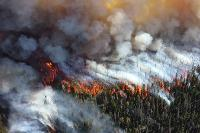

In [4]:
sm_id = 'f1b6a842fbea45bca693c2fe6622bf70'
sm_item = gis.content.get(sm_id)
sm_item

Note that to get a full list of the portal items owned by the current user, we can use the `gis.content.search()` method as below:

In [5]:
query_string = f"owner: {gis.users.me.username}"
user_items = gis.content.search(query=query_string, max_items=-1)
print(len(user_items), 'items returned belonging to current user')
user_items[:5]

1240 items returned belonging to current user


[<Item title:"Automate Road Surface Investigation Using Deep Learning" type:Notebook owner:api_data_owner>,
 <Item title:"Pick_Pizza_Shops_San_Francisco" type:Service Definition owner:api_data_owner>,
 <Item title:"ofek_aerial_imagery_for_deadsea" type:Service Definition owner:api_data_owner>,
 <Item title:"england_weather_stations" type:Shapefile owner:api_data_owner>,
 <Item title:"Community_College_Dist" type:Shapefile owner:api_data_owner>]

We can then call the [`list()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ResourceManager.list) method to return a list of this Items resources.

In [6]:
sm_resources = sm_item.resources.list()
print(len(sm_resources), 'resources found for selected item')
sm_resources

13 resources found for selected item


[{'resource': '1584837341913.jpeg',
  'created': 1610462633000,
  'size': 3565854,
  'access': 'inherit'},
 {'resource': '1584840733269.png',
  'created': 1610462633000,
  'size': 36384,
  'access': 'inherit'},
 {'resource': '1584977960300.png',
  'created': 1610462633000,
  'size': 363718,
  'access': 'inherit'},
 {'resource': '1584995889818.png',
  'created': 1610462634000,
  'size': 13850,
  'access': 'inherit'},
 {'resource': '1584995908437.png',
  'created': 1610462634000,
  'size': 14455,
  'access': 'inherit'},
 {'resource': '1584996591808.png',
  'created': 1610462634000,
  'size': 11135,
  'access': 'inherit'},
 {'resource': '1584996631292.png',
  'created': 1610462634000,
  'size': 11129,
  'access': 'inherit'},
 {'resource': '1585069439012.png',
  'created': 1610462635000,
  'size': 6470,
  'access': 'inherit'},
 {'resource': '1585080995091.png',
  'created': 1610462635000,
  'size': 152744,
  'access': 'inherit'},
 {'resource': '1585081014377.png',
  'created': 161046263500

We can put this list into a Pandas DataFrame for easily comparing and analyzing the different objects returned.

In [7]:
pd.DataFrame(sm_resources)

,resource,created,size,access
0,1584837341913.jpeg,1610462633000,3565854,inherit
1,1584840733269.png,1610462633000,36384,inherit
2,1584977960300.png,1610462633000,363718,inherit
3,1584995889818.png,1610462634000,13850,inherit
4,1584995908437.png,1610462634000,14455,inherit
5,1584996591808.png,1610462634000,11135,inherit
6,1584996631292.png,1610462634000,11129,inherit
7,1585069439012.png,1610462635000,6470,inherit
8,1585080995091.png,1610462635000,152744,inherit
9,1585081014377.png,1610462635000,143621,inherit


We can see that this `StoryMap` item returned resources of a couple different file types, including several `jpeg` and `png` files as well as a `json` and `xml` file.

Let's now look at a `Feature Layer Collection` object and see what types of resources it has available. 

<Item title:"Enriched_CrimeAnalysisData___Violent_Crime_2014" type:Feature Layer Collection owner:api_data_owner>
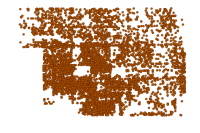

In [8]:
fs_id = '3d95a6aa9fa34243822138c7a9efc6b6'
fs_item = gis.content.get(fs_id)
fs_item

In [9]:
pd.DataFrame(fs_item.resources.list())

,resource,created,size,access
0,jobs/jf0e25a4606364e6992c440cf955b6e15.json,1624159076000,7741,inherit


As we can see, this `Feature Layer Collection` has only one resource file available - a single `json` file.

It is also possible for an `Item` to have no resource files, as we'll see when querying the `Web Map` object below. In this case, the `list()` method will return an empty list.

<Item title:"Coastline_India_l8" type:Web Map owner:api_data_owner>
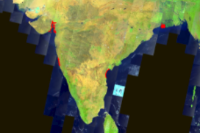

In [10]:
wm_id = 'a3e8eda445c34e95bdef7aa75bdd8a77'
wm_item = gis.content.get(wm_id)
wm_item

In [11]:
wm_item.resources.list()

[]

## Analyzing Resource File Data

Let's look at what we can do with some of the raw resource outputs from the `list()` method. Here we create a DataFrame object with the resources returned from the `StoryMap` object earlier.

In [12]:
sm_df = pd.DataFrame(sm_resources)
print(sm_df.shape)
sm_df

(13, 4)


,resource,created,size,access
0,1584837341913.jpeg,1610462633000,3565854,inherit
1,1584840733269.png,1610462633000,36384,inherit
2,1584977960300.png,1610462633000,363718,inherit
3,1584995889818.png,1610462634000,13850,inherit
4,1584995908437.png,1610462634000,14455,inherit
5,1584996591808.png,1610462634000,11135,inherit
6,1584996631292.png,1610462634000,11129,inherit
7,1585069439012.png,1610462635000,6470,inherit
8,1585080995091.png,1610462635000,152744,inherit
9,1585081014377.png,1610462635000,143621,inherit


To return a single row in our DataFrame we can use the [`loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) property by providing the corresponding index value in the leftmost column.

In [13]:
sample_resource = sm_df.loc[0]
sample_resource

resource    1584837341913.jpeg
created          1610462633000
size                   3565854
access                 inherit
Name: 0, dtype: object

The `created` value returned with resource objects are in the form of a POSIX timestamp, which is an integer corresponding to the number of seconds since the current epoch began. For more information see [here](https://en.wikipedia.org/wiki/Unix_time). To convert this integer to a more familiar representation, we can use the `datetime` module along with its [`fromtimestamp()`](https://docs.python.org/3/library/datetime.html#datetime.datetime.fromtimestamp) method.

In [14]:
dt = datetime.datetime.fromtimestamp(int(sample_resource.created/1000))
dt

datetime.datetime(2021, 1, 12, 9, 43, 53)

Our result is a `datetime` object, which we can display in string format with the `print()` command.

In [15]:
print(dt)

2021-01-12 09:43:53


This string format is also how the datetime object will render in either a Pandas DataFrame or Series. Using the `apply()` method we can create a new Series of datetime objects which correspond to the values in the `created` column. For more information on the `apply()` method see [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html).

In [16]:
datetimes = sm_df.created.apply(lambda x: datetime.datetime.fromtimestamp(int(x/1000)))
datetimes

0    2021-01-12 09:43:53
1    2021-01-12 09:43:53
2    2021-01-12 09:43:53
3    2021-01-12 09:43:54
4    2021-01-12 09:43:54
5    2021-01-12 09:43:54
6    2021-01-12 09:43:54
7    2021-01-12 09:43:55
8    2021-01-12 09:43:55
9    2021-01-12 09:43:55
10   2021-01-12 09:43:55
11   2021-01-12 09:43:56
12   2021-01-12 09:43:56
Name: created, dtype: datetime64[ns]

We can then insert this Series as a new column in our DataFrame using the [`insert()`]() method.

In [17]:
sm_df.insert(2,'created_datetime',datetimes)
sm_df

,resource,created,created_datetime,size,access
0,1584837341913.jpeg,1610462633000,2021-01-12 09:43:53,3565854,inherit
1,1584840733269.png,1610462633000,2021-01-12 09:43:53,36384,inherit
2,1584977960300.png,1610462633000,2021-01-12 09:43:53,363718,inherit
3,1584995889818.png,1610462634000,2021-01-12 09:43:54,13850,inherit
4,1584995908437.png,1610462634000,2021-01-12 09:43:54,14455,inherit
5,1584996591808.png,1610462634000,2021-01-12 09:43:54,11135,inherit
6,1584996631292.png,1610462634000,2021-01-12 09:43:54,11129,inherit
7,1585069439012.png,1610462635000,2021-01-12 09:43:55,6470,inherit
8,1585080995091.png,1610462635000,2021-01-12 09:43:55,152744,inherit
9,1585081014377.png,1610462635000,2021-01-12 09:43:55,143621,inherit


We can also use the `value_counts()` method in pandas to get a breakdown of the number of occurences for each value in a particular `Series` (e.g. a column in a `DataFrame`). Below we parse the file extension from values in the `resource` column as a new `Series` object and use `value_counts()` to then get the number of each file type.

In [18]:
sm_df.resource.apply(lambda x: x.split('.')[-1]).value_counts()

png     9
jpeg    2
json    1
xml     1
Name: resource, dtype: int64

## Exporting Resources

Also included in the `ResourceManager` class is a method to export all resources as a zip file. This [`export()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ResourceManager.export) method takes two parameters: `save_path` which declares the directory to save the zip file in and `file_name` which declares what name to give the zip file output. If no values are provided for either the `save_path` or `file_name` paramaters, then the zip file is uploaded to the default directory used for temporary files through [`tempfile.gettempdir()`](https://docs.python.org/3.7/library/tempfile.html#tempfile.gettempdir) and given a random 6 character name.

Here we download the `StoryMap` resources as a zip file in our local directory using the `os.getcwd()` method.

In [19]:
zip_name = "storymap_resources.zip"
sm_item.resources.export(save_path=os.getcwd(), file_name=zip_name)

# Check that the current directory now has that zip output
os.path.isfile(zip_name)

True

If we'd like to download just a single resource file, then we can use the `get()` method and provide the file name. Note that if the resource file is of type `json` and there are no values provided for the `out_folder` and `out_file_name` parameters (which behave similarly to `save_path` and `file_name` above) then the result will be stored in local memory as a `dictionary` object rather than saved to a `json` file. This behaviour can be avoided, however, by setting `try_json=False`.

For more information on using the `get()` method see [here](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ResourceManager.get).

In [20]:
# Get the json file at position 11 in the resource DataFrame above
file_name = sm_df.loc[11].resource
print(file_name)

# Output the dictionary returned from retrieving this json via get()
sm_item.resources.get(file_name)

oembed.json


{'version': '1.0',
 'type': 'rich',
 'title': 'Aufdecken von Mustern bei Flächenbränden rund um den Globus',
 'url': 'https://storymaps.arcgis.com/stories/0f5ef7b723cd410f8e4e298d716bcd73',
 'provider_name': 'ArcGIS StoryMaps',
 'provider_url': 'https://storymaps.arcgis.com',
 'width': 800,
 'height': 600,
 'thumbnail_url': 'https://www.arcgis.com/sharing/rest/content/items/0f5ef7b723cd410f8e4e298d716bcd73/info/thumbnail/ago_downloaded.jpg/',
 'thumbnail_height': '266',
 'thumbnail_width': '400',
 'html': '<iframe src="https://storymaps.arcgis.com/stories/0f5ef7b723cd410f8e4e298d716bcd73" width="800" height="600" scrolling="yes" frameborder="0" allowfullscreen></iframe>',
 'cache_age': 86400}